In [ ]:
from google.colab import files
import pandas as pd

print("Selecciona archivo deptos_out.csv")
up = files.upload()
csv_path = list(up.keys())[0]

df = pd.read_csv(csv_path, encoding="utf-8-sig")

Selecciona archivo deptos_out.csv


Saving deptos_out.csv to deptos_out (4).csv


In [ ]:
print("Filas, Columnas:", df.shape)
display(df.head(10))
print("\nColumnas:")
print(list(df.columns))

Filas, Columnas: (2016, 8)


,link,titulo,precio,moneda,superficie_util,superficie_total,dormitorios,banos
0,https://portalinmobiliario.com/MLC-1617197525-...,Departamento Vecinal Id: 141768,380000,$,40 m²,46 m²,2,1
1,https://portalinmobiliario.com/MLC-1621452161-...,Departamento Santos Dumont Id: 68362,360000,$,35 m²,40 m²,1,1
2,https://portalinmobiliario.com/MLC-1625018767-...,Departamento San Petersburgo Id: 151804,330000,$,50 m²,50 m²,3,1
3,https://portalinmobiliario.com/MLC-1626020561-...,Departamento Avenida El Parrón Id: 154426,320000,$,38 m²,38 m²,2,1
4,https://portalinmobiliario.com/MLC-1626094187-...,Departamento Avenida El Parrón Id: 154427,220000,$,19 m²,19 m²,1,1
5,https://portalinmobiliario.com/MLC-1626133025-...,Departamento Quinta Avenida Id: 154381,225000,$,48 m²,52 m²,2,1
6,https://portalinmobiliario.com/MLC-1630895147-...,Nuevo Y Equipado! Briones Luco 1d1b Metro Lo O...,150000,$,30 m²,30 m²,1,1
7,https://portalinmobiliario.com/MLC-1630934263-...,Departamento Abtao Id: 41396,150000,$,29 m²,32 m²,1,1
8,https://portalinmobiliario.com/MLC-1641640719-...,Amplio Estilo Mariposa 2d2b Vista Al Parque+ 1...,480000,$,50 m²,60 m²,2,2
9,https://portalinmobiliario.com/MLC-1645710821-...,"Penthouse En Arriendo, Amoblado.",75,UF,160 m²,200 m²,3,3



Columnas:
['link', 'titulo', 'precio', 'moneda', 'superficie_util', 'superficie_total', 'dormitorios', 'banos']


In [ ]:
import pandas as pd

cols_deseadas = ["precio","moneda","superficie_util","superficie_total","dormitorios","banos"]
cols_existentes = [c for c in cols_deseadas if c in df.columns]

df_modelo = df[cols_existentes].copy()

print("Columnas usadas:", cols_existentes)
print("Filas, Columnas:", df_modelo.shape)
display(df_modelo.head(10))

Columnas usadas: ['precio', 'moneda', 'superficie_util', 'superficie_total', 'dormitorios', 'banos']
Filas, Columnas: (2016, 6)


,precio,moneda,superficie_util,superficie_total,dormitorios,banos
0,380000,$,40 m²,46 m²,2,1
1,360000,$,35 m²,40 m²,1,1
2,330000,$,50 m²,50 m²,3,1
3,320000,$,38 m²,38 m²,2,1
4,220000,$,19 m²,19 m²,1,1
5,225000,$,48 m²,52 m²,2,1
6,150000,$,30 m²,30 m²,1,1
7,150000,$,29 m²,32 m²,1,1
8,480000,$,50 m²,60 m²,2,2
9,75,UF,160 m²,200 m²,3,3


In [ ]:
# Dejar solo filas con moneda "$" y mostrar una muestra
df_pesos = df_modelo.copy()
df_pesos["moneda_norm"] = df_pesos["moneda"].astype(str).str.strip()

# nos quedamos estrictamente con "$"
df_pesos = df_pesos[df_pesos["moneda_norm"] == "$"].drop(columns=["moneda_norm"])

print("Filas, Columnas (solo $):", df_pesos.shape)
display(df_pesos.head(10))

Filas, Columnas (solo $): (1653, 6)


,precio,moneda,superficie_util,superficie_total,dormitorios,banos
0,380000,$,40 m²,46 m²,2,1
1,360000,$,35 m²,40 m²,1,1
2,330000,$,50 m²,50 m²,3,1
3,320000,$,38 m²,38 m²,2,1
4,220000,$,19 m²,19 m²,1,1
5,225000,$,48 m²,52 m²,2,1
6,150000,$,30 m²,30 m²,1,1
7,150000,$,29 m²,32 m²,1,1
8,480000,$,50 m²,60 m²,2,2
10,580000,$,70 m²,70 m²,3,2


In [ ]:
import re
import numpy as np

def to_m2_float(x):
    if pd.isna(x):
        return np.nan
    s = str(x).lower()
    s = s.replace("m²", "").replace("m2", "").replace("m^2", "")
    s = s.replace(",", ".")
    nums = re.findall(r"\d*\.?\d+", s)
    if not nums:
        return np.nan
    vals = [float(n) for n in nums if n != ""]
    if not vals:
        return np.nan
    # si hay rango (varios números), usamos el promedio
    return float(np.mean(vals))

for col in ["superficie_util", "superficie_total"]:
    if col in df_pesos.columns:
        df_pesos[col] = df_pesos[col].apply(to_m2_float)

print("Tipos de datos tras conversión:")
display(df_pesos.dtypes)

print("\nMuestra convertida:")
display(df_pesos.head(10))

Tipos de datos tras conversión:


,0
precio,int64
moneda,object
superficie_util,float64
superficie_total,float64
dormitorios,int64
banos,int64



Muestra convertida:


,precio,moneda,superficie_util,superficie_total,dormitorios,banos
0,380000,$,40.0,46.0,2,1
1,360000,$,35.0,40.0,1,1
2,330000,$,50.0,50.0,3,1
3,320000,$,38.0,38.0,2,1
4,220000,$,19.0,19.0,1,1
5,225000,$,48.0,52.0,2,1
6,150000,$,30.0,30.0,1,1
7,150000,$,29.0,32.0,1,1
8,480000,$,50.0,60.0,2,2
10,580000,$,70.0,70.0,3,2


In [ ]:
# solo por si acaso

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Partimos de df_pesos ya filtrado a "$" y con superficies en float
df_arriendo = df_pesos.copy()

# Asegurar tipos numéricos en columnas clave
for col in ["dormitorios", "banos", "precio"]:
    if col in df_arriendo.columns:
        df_arriendo[col] = pd.to_numeric(df_arriendo[col], errors="coerce")

# Completar una superficie con la otra usando ratio mediana
if {"superficie_util","superficie_total"}.issubset(df_arriendo.columns):
    ambos = df_arriendo[["superficie_util","superficie_total"]].dropna()
    ratio_mediana = (ambos["superficie_total"] / ambos["superficie_util"]).clip(0.6, 2.5).median() if len(ambos) >= 30 else 1.15
    m_util_nan = df_arriendo["superficie_util"].isna() & df_arriendo["superficie_total"].notna()
    df_arriendo.loc[m_util_nan, "superficie_util"] = df_arriendo.loc[m_util_nan, "superficie_total"] / ratio_mediana
    m_tot_nan  = df_arriendo["superficie_total"].isna() & df_arriendo["superficie_util"].notna()
    df_arriendo.loc[m_tot_nan,  "superficie_total"] = df_arriendo.loc[m_tot_nan,  "superficie_util"] * ratio_mediana

# Features y target para el modelo
features = [c for c in ["superficie_util","superficie_total","dormitorios","banos"] if c in df_arriendo.columns]
target = "precio"

# Conjunto entrenable con precio presente
df_trainable = df_arriendo[features + [target]].copy()
df_trainable = df_trainable[df_trainable[target].notna()]

# Imputación simple de features (necesaria para el modelo)
imp = SimpleImputer(strategy="median")
X_all = imp.fit_transform(df_trainable[features].values)
y_all = df_trainable[target].values

print("Features usadas:", features)
print("Shape entrenable:", df_trainable.shape)
display(df_trainable.head(10))


Features usadas: ['superficie_util', 'superficie_total', 'dormitorios', 'banos']
Shape entrenable: (1653, 5)


,superficie_util,superficie_total,dormitorios,banos,precio
0,40.0,46.0,2,1,380000
1,35.0,40.0,1,1,360000
2,50.0,50.0,3,1,330000
3,38.0,38.0,2,1,320000
4,19.0,19.0,1,1,220000
5,48.0,52.0,2,1,225000
6,30.0,30.0,1,1,150000
7,29.0,32.0,1,1,150000
8,50.0,60.0,2,2,480000
10,70.0,70.0,3,2,580000


In [ ]:
# imports necesarios para el entrenamiento/metricas
!pip -q install scikit-learn

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

if len(features) == 0:
    raise ValueError("No hay features disponibles.")
if df_trainable.shape[0] < 50:
    print(f"Advertencia: pocas filas entrenables ({df_trainable.shape[0]}).")

In [ ]:
# Split
X_tr, X_va, y_tr, y_va = train_test_split(X_all, y_all, test_size=0.25, random_state=42)

# Objetivo logarítmico para estabilizar varianza
y_tr_log = np.log1p(y_tr)

# Modelo
rf = RandomForestRegressor(
    n_estimators=600, random_state=42, n_jobs=-1, min_samples_leaf=2
)
rf.fit(X_tr, y_tr_log)

# Validación en escala original ($)
y_va_pred_log = rf.predict(X_va)
y_va_pred = np.expm1(y_va_pred_log)

mae  = mean_absolute_error(y_va, y_va_pred)
rmse = np.sqrt(mean_squared_error(y_va, y_va_pred))
r2   = r2_score(y_va, y_va_pred)

print(f"Métricas validación ($):  MAE={mae:,.0f} | RMSE={rmse:,.0f} | R²={r2:.3f}")

Métricas validación ($):  MAE=112,588 | RMSE=190,287 | R²=0.803


# VALIDACION

In [ ]:
import numpy as np

mediana = float(np.median(y_va))
mape = float(np.mean(np.abs((y_va - y_va_pred) / np.maximum(y_va, 1e-6))) * 100)

print(f"Mediana precio valid: $ {mediana:,.0f}")
print(f"MAPE: {mape:.2f}%  (error relativo promedio)")

Mediana precio valid: $ 380,000
MAPE: 23.71%  (error relativo promedio)


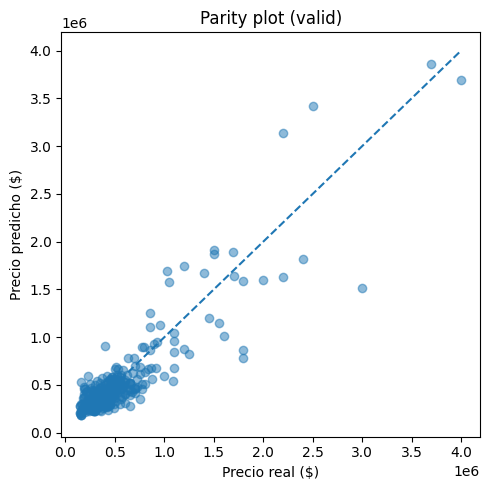

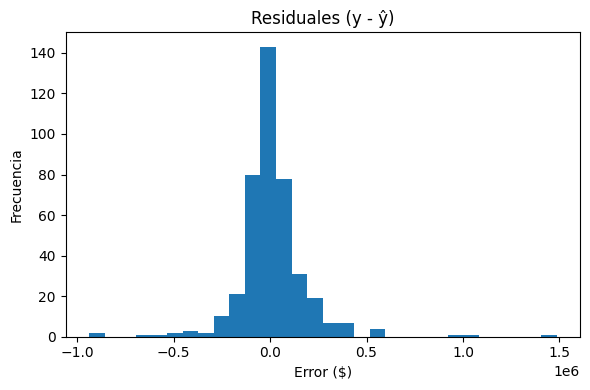

In [ ]:
import matplotlib.pyplot as plt
resid = y_va - y_va_pred

plt.figure(figsize=(5,5))
plt.scatter(y_va, y_va_pred, alpha=0.5)
mn, mx = min(y_va.min(), y_va_pred.min()), max(y_va.max(), y_va_pred.max())
plt.plot([mn,mx],[mn,mx],'--')
plt.xlabel("Precio real ($)")
plt.ylabel("Precio predicho ($)")
plt.title("Parity plot (valid)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.hist(resid, bins=30)
plt.title("Residuales (y - ŷ)")
plt.xlabel("Error ($)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
y_tr_pred = np.expm1(rf.predict(X_tr))
print(f"R² train: {r2_score(y_tr, y_tr_pred):.3f}  |  R² valid: {r2:.3f}")

R² train: 0.878  |  R² valid: 0.803


# VALIDACION

In [ ]:
# Reentrenar con todo el set disponible
rf_full = RandomForestRegressor(
    n_estimators=600, random_state=42, n_jobs=-1, min_samples_leaf=2
)
y_all_log = np.log1p(y_all)
rf_full.fit(imp.fit_transform(df_trainable[features].values), y_all_log)

# Construimos el ejemplo:
sup_util = 140.0
# Si también usamos superficie_total, la estimamos con ratio_mediana
sup_total = sup_util * ratio_mediana if "superficie_total" in features else None

ejemplo = {}
for f in features:
    if f == "superficie_util":   ejemplo[f] = sup_util
    elif f == "superficie_total":ejemplo[f] = sup_total
    elif f == "dormitorios":     ejemplo[f] = 4
    elif f == "banos":           ejemplo[f] = 2

X_ex = imp.transform(pd.DataFrame([ejemplo], columns=features).values)
pred_log = rf_full.predict(X_ex)[0]
pred_clp = float(np.expm1(pred_log))

print("Consulta (arriendo): 4 dormitorios, 2 baños, 140 m² útil")
print(f"Precio estimado: ~$ {pred_clp:,.0f} CLP")
print("\nVector usado:", ejemplo)

Consulta (arriendo): 4 dormitorios, 2 baños, 140 m² útil
Precio estimado: ~$ 1,604,206 CLP

Vector usado: {'superficie_util': 140.0, 'superficie_total': 148.0, 'dormitorios': 4, 'banos': 2}
